Welcome! This Jupyter notebook shows how to use OrganoidTracker from a notebook. We're going to show how to display images and how to create some analysis graphs. Performing the actual tracking from a notebook is not shown, as it's better to run those (sometimes slow) scripts outside a notebook.

Let's get started! First, let's get matplotlib setup:

In [36]:
import matplotlib.pyplot as plt
%matplotlib notebook

 Next, let's load a cell tracking data file. You'll need to edit the path so that it points to an actual `*.aut` file.

In [1]:
from organoid_tracker.imaging import io
experiment = io.load_data_file(r"C:\path\to\timelapse\Automatic with corrections.aut")

As a quick test, let's display the name of this experiment:

In [2]:
experiment.name

Name('nd799xy08')

We can also load the images. The `load_images` method requires two parameters. For a series of TIFF files, you need to provide the folder containing the TIFF files as the first parameter, and the file name pattern as the second parameter. Here, the pattern is `"nd799xy08t{time:03}c{channel}.tif"`, which would evaluate to `"nd799xy08t003c2.tif"` for time point 3 and channel 2.

# Loading and displaying images

In [7]:
from organoid_tracker.image_loading import general_image_loader
general_image_loader.load_images(experiment, r"C:\path\to\timelapse\images", "nd799xy08t{time:03}c{channel}.tif")

The images should now be added to the experiment. Let's try displaying an image! First, we view the available channels:

In [11]:
channels = experiment.images.get_channels()

channels

[_IndexedChannel(1), _IndexedChannel(2)]

Now we load an image of time point 3, and the channel `channel[0]`, which is the first channel. This will result in a large `numpy` array.

In [17]:
from organoid_tracker.core import TimePoint
array = experiment.images.get_image_stack(TimePoint(3), channels[0])

array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

It's better to display this as an actual image. The tifffile package contains a simple viewer for 3D images:

<IPython.core.display.Javascript object>


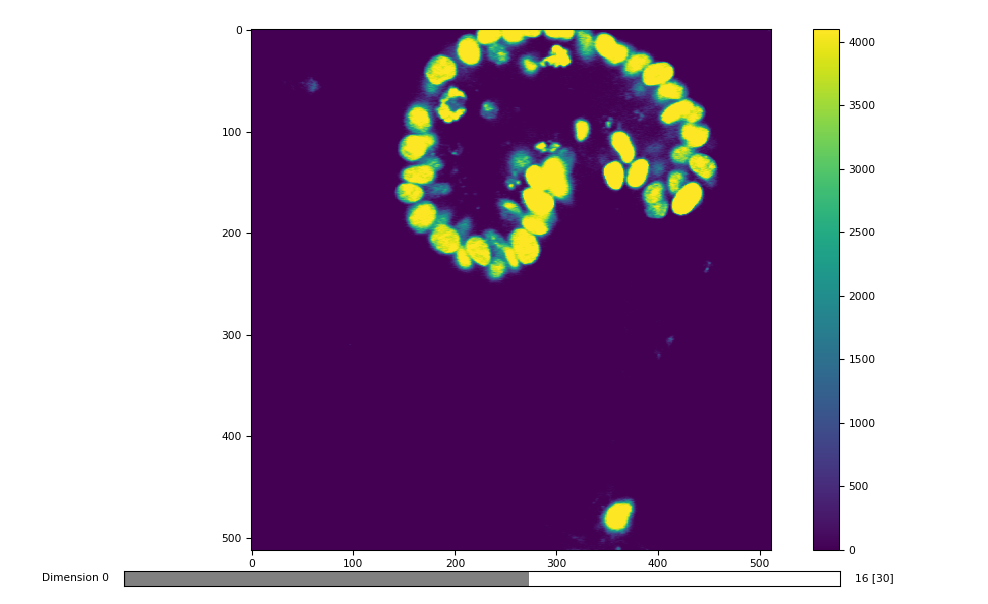

(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x200ba1345c0>)

In [30]:
import tifffile

tifffile.imshow(array)

Use the bar at the bottom to go through the z-stacks.

Note: you may find it easier to just write a plugin for the OrganoidTracker GUI, which includes a better 3D visualizer. OrganoidTracker has an option to reload the plugins without restarting the program, so developing a plugin is quite fast.

# Making a plot

What notebooks can do really well, is making quick graphs. Let's show how many cells there are in each time point. First, we collect this data.

In [41]:
time_point_numbers = []
position_count = []

# Count positions for every time point
for time_point in experiment.positions.time_points():
    positions = experiment.positions.of_time_point(time_point)
    position_count.append(len(positions))
    time_point_numbers.append(time_point.time_point_number())

# Show first 20 entries of this list
position_count[:20]

[179,
 184,
 194,
 199,
 200,
 202,
 203,
 203,
 201,
 202,
 202,
 202,
 202,
 202,
 203,
 201,
 201,
 201,
 203,
 200]

Now, we are going to plot this list:

<IPython.core.display.Javascript object>


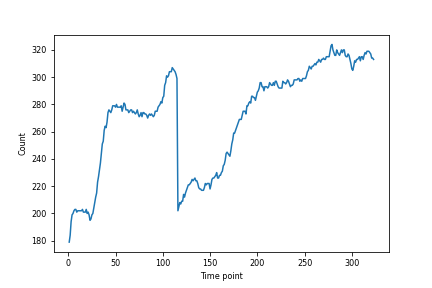

Text(0, 0.5, 'Count')

In [43]:
plt.plot(time_point_numbers, position_count)
plt.xlabel("Time point")
plt.ylabel("Count")